<a href="https://colab.research.google.com/github/swafe/Masterthesis/blob/master/train_test_Mask_rcnn_tf1_soiltype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tf_upgrade_v2 --intree Mask_RCNN --inplace --reportfile report.txt
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf

In [ ]:
import os
os.mkdir('/content/logs')

In [ ]:
import shutil
import os
tensorboard_files = ['soiltype20200909T0832_events.out.tfevents.1599640383.62038db3a048','soiltype20200909T1332_events.out.tfevents.1599658375.a75383f7bd91','soiltype20200910T0956_events.out.tfevents.1599731778.a4e2520acbe1']
src = os.path.join('/content/drive/My Drive/Colab/Weigths_train_model/phase_02',tensorboard_files[2])
dst = os.path.join('/content/logs',tensorboard_files[2]) #'/content/logs/events.out.tfevents.1599640383.62038db3a048'#/events.out.tfevents.1599640383.62038db3a048
shutil.copy(src,dst)

'/content/logs/soiltype20200910T0956_events.out.tfevents.1599731778.a4e2520acbe1'

In [ ]:
## cpu!!!!
# %cd '/content/logs/train'
import os
# %load_ext tensorboard
# logs ='/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200905T1659/events.out.tfevents.1599325159.33237dfc524c' 
# logs = os.path.join('/content',tensorboard_files[0])
# logs = '/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200910T0956_events.out.tfevents.1599731778.a4e2520acbe1'
logs = '/content/logs/'
%tensorboard --logdir logs

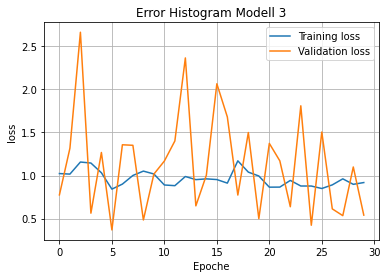

In [ ]:
import pandas as pd
df1 = pd.read_csv( '/content/scalars_train_soiltype20200910T0956') # model3'/content/scalars_train_soiltype20200910T0956')
df2 = pd.read_csv('/content/scalars_val_soiltype20200910T0956')    #model3#'/content/scalars_val_soiltype20200910T0956')

import matplotlib.pyplot as plt
plt.plot(df1['Value'],label = 'Training loss')
plt.plot(df2['Value'],label = 'Validation loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('Epoche')
plt.title('Error Histogram Modell 3')
plt.grid(True)

plt.savefig('/content/loss_Modell3_soiltype20200910T0956.png',dpi = 200)
plt.show()


# Load repository

Repository from github with the edited Mask R-CNN

In [ ]:
import shutil
import os

#falls git existiert löschen
path_data = '/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp'
if os.path.exists(path_data):
  print('g')
  shutil.rmtree(path_data)
  #os.remove(path_data)

#!git clone https://github.com/matterport/Mask_RCNN.git
!git clone https://github.com/swafe/Masterthesis.git

Cloning into 'Masterthesis'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 75 (delta 21), reused 66 (delta 15), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [ ]:
#choose model and change soiltype_inbalance_model_1 !!!!
model_mode = 1

In [ ]:
# import sys
# # ROOT_DIR = os.path.abspath("/content/Masterthesis/")
# # %cd '/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp/samples/soilsample'
# # sys.path.append('/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp')
# ROOT_DIR = os.path.abspath("/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp")
# sys.path.append(ROOT_DIR)
# print(ROOT_DIR)
# # from samples.soilsample import soiltype_inbalance_model_1 as soiltype

# import soiltype_inbalance_model_1 as soiltype 


/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp/samples/soilsample
/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp


Using TensorFlow backend.


In [ ]:
# %cd 
# ROOT_DIR = os.path.abspath("/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp")
# sys.path.append(ROOT_DIR)
# from mrcnn.model_inbalanced import log
# from mrcnn.config import Config

/root


# # Mask_rcnn_small_tf1 

based on  Mask R-CNN - Inspect Balloon Training Data.
Inspect and visualize data loading and pre-processing code.




In [ ]:

import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import importlib
import glob
import shutil
import imgaug
from distutils.dir_util import copy_tree
# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp")
# %cd '/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp'
# Import Mask RCNN
sys.path.append('/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp') #'Mask_rcnn_small_tf1_soiltyp')  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize_thick as visualize
from mrcnn.visualize_thick import display_images
import mrcnn.model_inbalanced as modellib
from mrcnn.model_inbalanced import log
# from mrcnn.config import Config
# %cd '/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp'  # /samples/soilsample
#when changing  soilsample name change command '!python3 soilsample.py train'
# from samples.soilsample import soiltype as soiltype
# if model == 1: #soiltype_inbalance_model_1 oder soiltype_inbalance_model_3
  # print('J')
# sys.path.append('/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp')
%cd '/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp/samples/soilsample'
# from samples.soilsample import soiltype_inbalance_model_1 as soiltype 
import soiltype_inbalance_model_1 as soiltype 
# import soiltype_inbalance_model_1 as soiltype 
# else:
#   from samples.soilsample import soiltype_inbalance_model_3 as soiltype
%cd

%matplotlib inline 

from datetime import datetime
import csv
import random

/content/Masterthesis/Mask_rcnn_small_tf1_soiltyp/samples/soilsample
/root


Using TensorFlow backend.


In [ ]:
%cd '/content/Mask_rcnn_small_tf1_soiltyp'
sys.path.append('Mask_rcnn_small_tf1_soiltyp')
importlib.reload(soiltype)

/content/Mask_rcnn_small_tf1_soiltyp


<module 'samples.soilsample.soiltype_inbalance_model_1' from '/content/Mask_rcnn_small_tf1_soiltyp/samples/soilsample/soiltype_inbalance_model_1.py'>

In [ ]:
# # load data with dataset images for train, val and test
# #falls git existiert löschen
# path_data = '/content/data'
# if os.path.exists(path_data):
#   shutil.rmtree(path_data)
#   #os.remove(path_data)

# !git clone https://github.com/swafe/data.git


!!!Do not run next cell!!!! 

In [ ]:
#Connect to google drive to load weights from '.h5'-file. '.h5'file is to big to store in github#
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Upload Weights from google drive.
If no access to google drive, upload 'mask_rcnn_balloon.h5' into colab (see left toolbar) and change 
* fscr = '/content/mask_rcnn_balloon.h5'  
use 'Ctr + /' to comment/uncomment  
Link zu google drive to download weigths ('mask_rcnn_balloon.h5')   
* https://drive.google.com/drive/folders/1enjr2AhaeYLGD4CzN809yknnGfp5-Odx?usp=sharing    


# Load Dataset

In [ ]:
# import os
# import shutil
# from distutils.dir_util import copy_tree
# # if data from google drive
# if True:
#   path_data = '/content/data'
#   if os.path.exists(path_data):
#     shutil.rmtree(path_data)
#     # os.remove(path_data)
#   # os.makedirs(path_data)
#   print('tt')
#   fsrc = '/content/drive/My Drive/Colab/data/phase_02/'
#   fdst = path_data
#   copy_tree(fsrc,fdst)
#   #data/phase_02/train  ...

### Functions

In [ ]:
def count_soiltypes(json_data, data_keys, classes_soiltype):
  classes_soiltype_id = [*range(0,len(classes_soiltype),1)]
  count_soiltypes =[0] *  len(classes_soiltype) #np.zeros((len(classes_soiltype)))
  
  for key in data_keys:
    for regions_i_3 in json_data[key]['regions']:
      soiltype_3 = regions_i_3['region_attributes']['soiltype']
      for i_type in classes_soiltype_id:
        if soiltype_3 == i_type:
            count_soiltypes[i_type] = count_soiltypes[i_type] + 1
  return count_soiltypes

def split_rawData_train_val_test(raw_Data_folder_path, filename_json, new_Dataset_path, train_prop=0.7, val_prop=0.25,
                                 soiltypes_to_detect = 'all',soiltype_filter_list=None, test_only = False,
                                 copy_img = True, copy_json = True, data_shuffle = False):  
    """
    raw_Data_folder_path: path to folder with snipped IMG in RGB format and labeld + Annotation from VGG.
        rememder to change region_names to id 
    filename_json: file name of json has to be stored in raw_Data_folder_path
    new_Dataset_path: path to new folder './Dataset_splited'
    
    train_prop, val_prop, (test_prop): ratio of Images 
    soiltypes_to_detect: 'all' or 'filter'  TODO add further types

    returns folder train_val_test= ['train', 'val', 'test'] with json annoation
    """
    root_project_path = raw_Data_folder_path
    # load json of all images
    path_filename_json = os.path.join(root_project_path,filename_json) #'changed_json.json') #via_project_merged.json')
    # copy attributes and other project settings from one of the projects
    # assumption: all the projects have same attributes and settings
    via2 = {}
    with open(path_filename_json, 'r') as f:
      via2 = json.load(f)
    #
    #
    data_keys_json = list(via2.keys()) 
    if data_shuffle == True:
      random.seed(6)
      random.shuffle(data_keys_json)
    if soiltypes_to_detect == 'filter':
        data_new2 = via2               
        data_keys_json2 = list(data_new2.keys())
        
        for key in data_keys_json2:
            no_region_counter = 0
            region_remove = []
            for idx_regions, regions_i in enumerate(data_new2[key]['regions']):

                if len(regions_i['region_attributes']) == 0:
                    print(key)
                    print('jooooo')
                    no_region_counter = 1
                else:
                    soiltype = regions_i['region_attributes']['soiltype']

                    if soiltype not in soiltype_filter_list : #!= 5 : #5 for Feinsand
                        # print(idx_regions)
                        region_remove.append(idx_regions)
    #                else:
    #                    print('not in class')
    #                region_counter = region_counter + 1
            if no_region_counter == 0:
                for i_remove in sorted(region_remove, reverse=True):
    #                print(data_new2[key]['regions'][i_remove])
                    del data_new2[key]['regions'][i_remove]
    #
    #
    #seperate json
    data_keys_json_train_val_test = []       
    data_keys_json_train = data_keys_json[0: int(train_prop * np.size(data_keys_json))]
    data_keys_json_val = data_keys_json[int(train_prop * np.size(data_keys_json)):int(train_prop * np.size(data_keys_json))+ int(val_prop * np.size(data_keys_json)+1)]
    data_keys_json_test = data_keys_json[int(train_prop * np.size(data_keys_json)+1)+ int(val_prop * np.size(data_keys_json)):]
    data_keys_json_train_val_test = [data_keys_json_train, data_keys_json_val, data_keys_json_test]

    #### make csv list of soiltypes train, val, test
    classes_soiltype = ["Mutterboden","Schluff","Klei","Torf","Sand","Feinsand","Mittelsand",
                        "Plastik","Unbekannt","Darg","Mudde","Grobsand","Wurzeln","Torf + Sand",
                        "Braunkohle + Holz","Auffuellung", 'Grobschluff', 'Ton', 'Tonstein']
    soiltypes_counter_train = count_soiltypes(via2,data_keys_json_train,classes_soiltype)
    soiltypes_counter_val = count_soiltypes(via2,data_keys_json_val,classes_soiltype)
    soiltypes_counter_test = count_soiltypes(via2,data_keys_json_test,classes_soiltype)
    
    soiltypes_counter_train_val_test = [classes_soiltype, soiltypes_counter_train, soiltypes_counter_val, soiltypes_counter_test]
    
    print(soiltypes_counter_train_val_test)
    via2_split = []
    if soiltypes_to_detect == 'all':
        via2_train = dict((k,via2[k]) for k in data_keys_json_train)
        via2_val = dict((k,via2[k]) for k in data_keys_json_val)
        via2_test = dict((k,via2[k]) for k in data_keys_json_test)
    
    elif soiltypes_to_detect == 'filter':
        via2_train = dict((k,data_new2[k]) for k in data_keys_json_train)
        via2_val = dict((k,data_new2[k]) for k in data_keys_json_val)
        via2_test = dict((k,via2[k]) for k in data_keys_json_test)
    via2_split= [via2_train, via2_val, via2_test ]
    #
    #
    #copy images to train, val and test folder
    
    # define the name of the directory to be created
    if test_only:
      test_only_start = 2
    else:
      test_only_start = 0

    train_val_test= ['train', 'val', 'test']
    for i_train_val_test in range(test_only_start,len(train_val_test)):
        path_train_val_test = os.path.join(new_Dataset_path,train_val_test[i_train_val_test])
        # if os.path.exists(path_train_val_test):
        #     shutil.rmtree(path_train_val_test)
        #     os.makedirs(path_train_val_test)
        # else:
        #     os.makedirs(path_train_val_test)
            
        if copy_img:
            if os.path.exists(path_train_val_test):
              shutil.rmtree(path_train_val_test)
              os.makedirs(path_train_val_test)
            else:
              os.makedirs(path_train_val_test)
            for i in data_keys_json_train_val_test[i_train_val_test]:
                img_filename = via2_split[i_train_val_test][i]['filename'] 
                src = os.path.join(root_project_path,img_filename)
                dst = path_train_val_test
                shutil.copy(src,dst)    
        new_splited_json_all = ['via_train.json', 'via_val.json', 'via_test.json']   
        new_splited_json_Feinsand = ['via_train_Feinsand.json', 'via_test_Feinsand.json', 'via_test_Feinsand.json']
        if copy_json:
            if soiltypes_to_detect == 'all':
                output_filename = os.path.join(path_train_val_test,new_splited_json_all[i_train_val_test])
            elif soiltypes_to_detect == 'filter':
                output_filename = os.path.join(path_train_val_test,new_splited_json_all[i_train_val_test]) # changed new_splited_json_Feinsand
            with open(output_filename, 'w') as fout:
              json.dump(via2_split[i_train_val_test], fout)  
    return soiltypes_counter_train_val_test
   

## load Data 

In [ ]:
model_mode_folder = ['snipped_ohne_sign_all_RGB', 'dataset_8205_1/snipped_ohne_sign', '9091_und_8205_1/snipped_ohne_sign']
model_mode_filename_json =['changed_json_soiltype_id.json', 'changed_json_soiltype_id.json', 'changed_json_soiltype_id_8091_8205.json']
model_mode_soiltype_filter = [[0,1,2,3, 5, 6, 7,15], [0,1, 5, 6, 7,15,16,17], [0,1, 2, 3, 5, 6, 7,15,16,17]]

In [ ]:
# change rawData inti train, val, test fodler
raw_Data_folder_path = os.path.join('/content/drive/My Drive/Colab/data/phase_02/',model_mode_folder[model_mode-1]) #'/content/drive/My Drive/Colab/data/phase_02/snipped_ohne_sign_all_RGB'   #model_01  snipped_ohne_sign_all_RGB ###  model_02  dataset_8205_1/snipped_ohne_sign  ###  model03  9091_und_8205_1/snipped_ohne_sign         #'/content/drive/My Drive/Colab/data/phase_02/dataset_8205_1/snipped_ohne_sign' #'/content/drive/My Drive/Colab/data/phase_02/snipped_ohne_sign_all_RGB'
filename_json = model_mode_filename_json[model_mode-1] 
new_Dataset_path  = '/content/rawData_train_val_test' 

soiltype_filter =model_mode_soiltype_filter[model_mode-1]  
        # self.add_class("soiltype",0,"Mutterboden")
        # self.add_class("soiltype",1,"Schluff")
        # self.add_class("soiltype",2,"Klei")
        # self.add_class("soiltype",3,"Torf")
        # self.add_class("soiltype",4,"Sand")
        # self.add_class("soiltype",5,"Feinsand")
        # self.add_class("soiltype",6,"Mittelsand")
        # self.add_class("soiltype",7,"Plastik")
        # self.add_class("soiltype",8,"Unbekannt")
        # self.add_class("soiltype",9,"Darg")
        # self.add_class("soiltype",10,"Mudde")
        # self.add_class("soiltype",11,"Grobsand")
        # self.add_class("soiltype",12,"Wurzeln")
        # self.add_class("soiltype",13,"Torf + Sand")
        # self.add_class("soiltype",14,"Braunkohle + Holz")
        # self.add_class("soiltype",15,"Auffuellung")
        # self.add_class("soiltype",16,"Grobschluff")
        # self.add_class("soiltype",17,"Ton")
        # self.add_class("soiltype",18,"Tonstein")
 
###### split Data into train, val, test and create folders ######
#set soiltypes_to_detect = 'filter' or 'all' and return soiltypes_counter_train_val_test
soiltypes_counter_train_val_test = split_rawData_train_val_test(raw_Data_folder_path, filename_json, new_Dataset_path, train_prop = 0.7, val_prop=0.3,
                                 soiltypes_to_detect = 'filter',soiltype_filter_list = soiltype_filter, test_only = False,
                                 copy_img = True, copy_json = True,data_shuffle = True)

#if only get dataset_test change in function at for loop

#count number images train,val,test
train_val_test= ['train', 'val', 'test']
count_images_train_val_test = []
for i, value in enumerate(train_val_test):
  path_train_val_test = os.path.join(new_Dataset_path,value)
  if os.path.exists(path_train_val_test):
      for dirpath, dirnames, filenames in os.walk(path_train_val_test):
        count_images= len(filenames)-1
  else:
    count_images = 0
  count_images_train_val_test.append(count_images)
print(count_images_train_val_test)

csv_path = raw_Data_folder_path
path_Soiltypes_csv = os.path.join(csv_path,'Soiltypes_train_val_test.csv')
with open(path_Soiltypes_csv, "w", newline="") as f_stypes: 
    if False: #True False         
        writer = csv.writer(f_stypes)
        writer.writerows([soiltypes_counter_train_val_test[0]])
        writer.writerows([soiltypes_counter_train_val_test[1]])
        writer.writerows([soiltypes_counter_train_val_test[2]])
        writer.writerows([soiltypes_counter_train_val_test[3]])
        writer.writerows([count_images_train_val_test])


[['Mutterboden', 'Schluff', 'Klei', 'Torf', 'Sand', 'Feinsand', 'Mittelsand', 'Plastik', 'Unbekannt', 'Darg', 'Mudde', 'Grobsand', 'Wurzeln', 'Torf + Sand', 'Braunkohle + Holz', 'Auffuellung', 'Grobschluff', 'Ton', 'Tonstein'], [7, 33, 146, 80, 0, 217, 93, 178, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0], [5, 15, 61, 36, 0, 86, 40, 80, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[391, 168, 0]


## Analyse training and validation Data

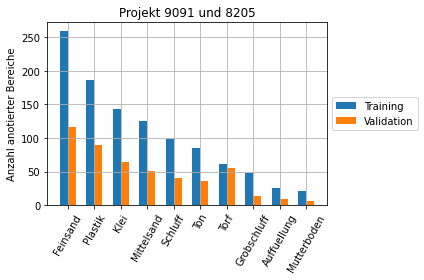

In [ ]:
####Auswertung annotierter Bereiche mit filter

#filter and sort results
# soiltypes_counter_train_val_test = soiltypes, train,val,test
# 1 filter soiltype_filter
labels = []
train= []
val = []
test = []
for i in soiltype_filter:
  labels.append(soiltypes_counter_train_val_test[0][i])
  train.append(soiltypes_counter_train_val_test[1][i])
  val.append(soiltypes_counter_train_val_test[2][i])
  test.append(soiltypes_counter_train_val_test[3][i])

# 2. sort after soiltype_counter_bar high to low
train_sort_id = sorted(range(len(train)), key=lambda k: train[k],reverse=True)

labels_sort = [labels[i] for i in train_sort_id]
train_sort = [train[i] for i in train_sort_id]
val_sort =[val[i] for i in train_sort_id]
test_sort = [test[i] for i in train_sort_id]

#######plot########
x = np.arange(len(labels_sort))  # the label locations
width = 0.3  # the width of the bars
# plt.figure(figsize=(4.5, 2.5))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, train_sort, width, label='Training') #color = 'b' 'accuracy_gt_detection = soiltyps_sum_accouracy/soiltype_counter'
rects2 = ax.bar(x + width/2, val_sort, width, label='Validation')
# rects3 = ax.bar(x + 1.5*width, test_sort, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Anzahl anotierter Bereiche')
ax.set_xticks(x)
ax_title = ['Projekt 9091', 'Projekt 8205', 'Projekt 9091 und 8205']
ax.set_title(ax_title[model_mode-1]) #Projekt 9091 oder Projekt8205, Projekt 9091 und 8205
plt.xticks(x, labels_sort, rotation=60)
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
plt.gca().legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.gca().legend(bbox_to_anchor=(0., 1.02, 1.02, .102), loc=3, mode="expand", borderaxespad=1)
plt.grid(True)
fig.tight_layout()
path_to_image_model_mode = ['Verteilung_anotation_Bodenart_filter_9091.png','Verteilung_anotation_Bodenart_filter8205.png','Verteilung_anotation_Bodenart_filter_9091_8205.png']
path_to_image = os.path.join(raw_Data_folder_path,path_to_image_model_mode[model_mode-1]) #change project names !!!!
# plt.savefig(path_to_image,'Genauigkeit_IoU.pgf')
if False:
  plt.savefig(path_to_image,dpi = 200)
plt.show()


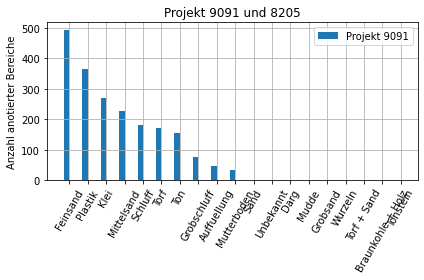

In [ ]:
#Auswertung anotierter Bereiche alle Bodenarte


#filter and sort results
# soiltypes_counter_train_val_test = soiltypes, train,val,test
# 1 filter soiltype_filter
labels = []
train= []
val = []
test = []
for i in soiltype_filter:
  labels.append(soiltypes_counter_train_val_test[0][i])
  train.append(soiltypes_counter_train_val_test[1][i])
  val.append(soiltypes_counter_train_val_test[2][i])
  test.append(soiltypes_counter_train_val_test[3][i])

###lists addition
all_soiltypes = [soiltypes_counter_train_val_test[1][i] + soiltypes_counter_train_val_test[2][i]+ soiltypes_counter_train_val_test[2][i] for i in range(len(soiltypes_counter_train_val_test[1]))] 
# 2. sort after soiltype_counter_bar high to low
all_soiltypes_sort_id = sorted(range(len(all_soiltypes)), key=lambda k: all_soiltypes[k],reverse=True)
labels_sort = [soiltypes_counter_train_val_test[0][i] for i in all_soiltypes_sort_id] 
all_soiltypes_sort = [all_soiltypes[i] for i in all_soiltypes_sort_id]




#######plot########
x = np.arange(len(labels_sort))  # the label locations
width = 0.3  # the width of the bars
# plt.figure(figsize=(4.5, 2.5))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, all_soiltypes_sort, width, label='Projekt 9091') #color = 'b' 'accuracy_gt_detection = soiltyps_sum_accouracy/soiltype_counter'
# rects2 = ax.bar(x + width/2, val_sort, width, label='Validation')
# rects3 = ax.bar(x + 1.5*width, test_sort, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Anzahl anotierter Bereiche')
ax.set_xticks(x)
ax_title = ['Projekt 9091', 'Projekt 8205', 'Projekt 9091 und 8205']
ax.set_title(ax_title[model_mode-1]) #Projekt 9091 oder Projekt8205, Projekt 9091 und 8205
plt.xticks(x, labels_sort, rotation=60)
ax.legend()
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
# plt.gca().legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.gca().legend(bbox_to_anchor=(0., 1.02, 1.02, .102), loc=3, mode="expand", borderaxespad=1)
plt.grid(True)
fig.tight_layout()
path_to_image = os.path.join(raw_Data_folder_path,'Verteilung_anotation_Bodenart_all_9091_8205.png')#change project names !!!!
# plt.savefig(path_to_image,'Genauigkeit_IoU.pgf')
plt.savefig(path_to_image,dpi = 200)
plt.show()


In [ ]:
# classes_soiltype = ["Mutterboden","Schluff","Klei","Torf","Sand","Feinsand","Mittelsand",
#                             "Plastik","Unbekannt","Darg","Mudde","Grobsand","Wurzeln","Torf + Sand",
#                             "Braunkohle + Holz","Auffuellung",'Grobschluff','Ton','Tonstein']


# Training

## Copy Dataset
copy training and valdation Dataset + Json into right directory and change json into predefined filename.
Paths and filenames are predefined in soiltype.py

In [ ]:
#change here: rename src_train and src_val json files 
src_train = '/content/rawData_train_val_test/train/via_train.json' # '/content/data/train/RGB/changed_json.json' #via_train_Feinsand.json'
src_val = '/content/rawData_train_val_test/val/via_val.json' #'/content/data/val/RGB/changed_json.json' #via_val_Feinsand.json'

path_train = os.path.split(src_train)[0]
dst_train =  os.path.join(path_train,'via_region_data.json')
shutil.copy(src_train, dst_train) 

path_val = os.path.split(src_val)[0]
dst_val =  os.path.join(path_val,'via_region_data.json')
shutil.copy(src_val, dst_val)

In [ ]:
# 1. create standard folder [train, val]
# 2. copy uploaded data (images) into this folders
from distutils.dir_util import copy_tree
#do not change paths
path_datasets = ['/content/data/datasets/soilsample/train', '/content/data/datasets/soilsample/val']
for i in path_datasets:
  if not os.path.exists(i):
    #print(i)
    os.makedirs(i)
  else:
    print(i+' already exists')

toDirectory = path_datasets[0]
copy_tree(path_train, toDirectory)
    
toDirectory = path_datasets[1]
copy_tree(path_val, toDirectory)


NameError: ignored

Augmentation is defined in soilsample.py


In [ ]:
# augmenation with load_image_gt from model.py (as modellib)
# use data_generator. datagenerater uses load_image_gt

# see section Datagenerator


## Prepare train and validation Dataset

In [ ]:
dataset = '/content/data/datasets/soilsample'

# Training dataset.
dataset_train = soiltype.SoilsampleDataset()
dataset_train.load_soilsample(dataset, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = soiltype.SoilsampleDataset()
dataset_val.load_soilsample(dataset, "val")
dataset_val.prepare()

## Configurations
change configurations here and run following cell untill alternative or 
Configurations are defined in soilsample.py and run cell after Alternative

In [ ]:
config = soiltype.SoilsampleConfig()
# Soilsample_DIR = os.path.join(ROOT_DIR, "/content/data/vgg_annotation")
# # if data from google drive
# if True:
#   Soilsample_DIR = os.path.join(ROOT_DIR, "data/phase_02")

In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class SoilsampleConfig(config.__class__):
    # Run detection on one image at a time

    STEPS_PER_EPOCH = 100 # = dataset_train.size  #100 in soiltype.py # 1000 in config.py
    #VALIDATION_STEPS = 50 # = dataset_val.size
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.8      
    
    # Number of classes (including background)
    # NUM_CLASSES = 1 + 16  # Background + soilsample

config = SoilsampleConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.7
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                32
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Load Model

### Instantiate Model

In [ ]:
MODEL_DIR = os.path.join('/content/Mask_rcnn_small_tf1_soiltyp', "logs")
model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=MODEL_DIR)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


### Load weights 

We can train from scratch or use pretrained weights to speed up modeltraining.
ToDo:
Train backbone and head architecture!

In [ ]:
# https://github.com/matterport/Mask_RCNN/issues/527
# load coco
#copy weight .h5
#muss mask_rcnn_balloon.h5 wirklich geladen werden ???? bzw ist es besser Gewichte von letztem Trainig zu laden
#fsrc = '/content/mask_rcnn_balloon.h5'
fsrc = '/content/drive/My Drive/Colab/Weigths_train_model/mask_rcnn_balloon.h5'

fdst = '/content/Mask_rcnn_small_tf1_soiltyp/samples/soilsample'
shutil.copy(fsrc,fdst)



'/content/Mask_rcnn_small_tf1_soiltyp/samples/soilsample/mask_rcnn_balloon.h5'

In [ ]:
#'/content/Mask_rcnn_small_tf1_soiltyp/samples/soilsample/mask_rcnn_balloon.h5' #
model_1_weights = []
model_2_weights = []
model_3_weights = []
SOILSAMPLE_WEIGHTS_PATH = '/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200906T1139_mask_rcnn_soiltype_0029.h5' #soiltype20200906T2044_mask_rcnn_soiltype_0029.h5' #soiltype20200901T1502_mask_rcnn_soiltype_0015.h5' #soiltype20200906T0635_mask_rcnn_soiltype_0030.h5'#'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200905T1659_mask_rcnn_soiltype_0030.h5'#'/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200905T1659/mask_rcnn_soiltype_0015.h5'#'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200905T1403_mask_rcnn_soiltype_0015.h5'#'/content/drive/My Drive/Colab/Weigths_train_model/mask_rcnn_balloon.h5'#'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200901T1502_mask_rcnn_soiltype_0015.h5' #/content/drive/My Drive/Colab/Weigths_train_model/phase_02/mask_rcnn_soiltype_0015_treashhold_changed_01_class_weights_new_regions_0015_02.h5' #'/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200804T1236/mask_rcnn_soiltype_0015_treashhold_changed_01_class_weights_new_regions_0015_01.h5'#'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/mask_rcnn_soiltype_0015_treashhold_changed_01.h5'
weights_path = SOILSAMPLE_WEIGHTS_PATH

In [ ]:
model.load_weights(weights_path,by_name = True)#, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"]) #, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"]) #by_name = True
#https://github.com/matterport/Mask_RCNN/issues/849
# add  exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"] when training first time with different class_num in weights. If classnum are equall this is not needed

In [ ]:
# %cd '/content/Mask_rcnn_small_tf1_soiltyp'
sys.path.append('Mask_rcnn_small_tf1_soiltyp')
importlib.reload(soiltype)

<module 'samples.soilsample.soiltype_inbalance_model_3' from 'Mask_rcnn_small_tf1_soiltyp/samples/soilsample/soiltype_inbalance_model_3.py'>

### Inbalanced Dataset: Class_weights

In [ ]:
# use change_json_key.py to count number of regions  oder new see function above 
# CLASS_WEIGHTS_occurence = { 1:5,  2:12,  3:75, 4:32, 5:3, 6:210, 7:76, 8:96, 9:6, 10:2, 11:1, 12:11, 13:3, 14:3} #train
# CLASS_WEIGHTS_occurence = { 1:12,  2:48,  3:207, 4:116, 5:11, 6:303, 7:133, 8:258, 9:6, 10:13, 12:11, 13:3} #train

# ["Mutterboden","Schluff","Klei","Torf","Sand","Feinsand","Mittelsand","Plastik","Unbekannt","Darg","Mudde","Grobsand","Wurzeln","Torf + Sand",
# "Braunkohle + Holz","Auffuellung", 'Grobschluff', 'Ton', 'Tonstein']
important_soiltypes = soiltype_filter # [0,1,2,3,4,5,6,7,8,15,16,17]
CLASS_WEIGHTS_occurence = {}
for dict_key in important_soiltypes:
  class_i_count = soiltypes_counter_train_val_test[1][dict_key]
  CLASS_WEIGHTS_occurence[dict_key] = class_i_count
# CLASS_WEIGHTS_occurence = {2:17,  3:93, 4:52, 6:254, 7:79} #train ohne val. Schluff bis plastik

# [1"Mutterboden","2Schluff","3Klei","4Torf","5Sand","6Feinsand","7Mittelsand",
#                             "8Plastik","9Unbekannt","10Darg","11Mudde","12Grobdsand","13Wurzeln","Torf + Sand",
#                             "Braunkohle + Holz","Auffuellung"]
def compute_class_weights(CLASS_WEIGHTS):
    mean = np.array(list(CLASS_WEIGHTS.values())).mean() # sum_class_occurence / nb_classes
    max_weight = np.array(list(CLASS_WEIGHTS.values())).max()
    CLASS_WEIGHTS.update((x, int(max_weight/(y))) for x, y in CLASS_WEIGHTS.items())
    CLASS_WEIGHTS=dict(sorted(CLASS_WEIGHTS.items()))
    return CLASS_WEIGHTS 
print(CLASS_WEIGHTS_occurence)
CLASS_WEIGHTS = compute_class_weights(CLASS_WEIGHTS_occurence)
print(CLASS_WEIGHTS_occurence)
print(CLASS_WEIGHTS)

{0: 21, 1: 99, 2: 143, 3: 61, 5: 259, 6: 125, 7: 186, 15: 26, 16: 48, 17: 85}
{0: 12, 1: 2, 2: 1, 3: 4, 5: 1, 6: 2, 7: 1, 15: 9, 16: 5, 17: 3}
{0: 12, 1: 2, 2: 1, 3: 4, 5: 1, 6: 2, 7: 1, 15: 9, 16: 5, 17: 3}


In [ ]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)

# Run Training

In [ ]:
import imgaug
class_weight = CLASS_WEIGHTS # CLASS_WEIGHTS or None
model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=30,
                layers='heads',
                class_weight = class_weight,
                augmentation = imgaug.augmenters.Sometimes(5/6,imgaug.augmenters.OneOf([ 
                    imgaug.augmenters.Fliplr(1), 
                    imgaug.augmenters.Flipud(1), 
                    imgaug.augmenters.Affine(rotate=(-45, 45)), 
                    imgaug.augmenters.Affine(rotate=(-90, 90)), 
                    imgaug.augmenters.Affine(scale=(0.5, 1.5))])))
history = model.keras_model.history.history


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200910T0956/mask_rcnn_soiltype_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDist

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/tensorflow-1.15.2/python3.6/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/30
100/100 [==============================] - 345s 3s/step - loss: 1.0231 - val_loss: 0.7757

Epoch 2/30
100/100 [==============================] - 279s 3s/step - loss: 1.0169 - val_loss: 1.3170
Epoch 3/30
100/100 [==============================] - 278s 3s/step - loss: 1.1569 - val_loss: 2.6625
Epoch 4/30
100/100 [==============================] - 277s 3s/step - loss: 1.1453 - val_loss: 0.5636
Epoch 5/30
100/100 [==============================] - 277s 3s/step - loss: 1.0321 - val_loss: 1.2677
Epoch 6/30
100/100 [==============================] - 277s 3s/step - loss: 0.8426 - val_loss: 0.3694
Epoch 7/30
100/100 [==============================] - 277s 3s/step - loss: 0.9009 - val_loss: 1.3572
Epoch 8/30
100/100 [==============================] - 276s 3s/step - loss: 1.0010 - val_loss: 1.3510
Epoch 9/30
100/100 [==============================] - 276s 3s/step - loss: 1.0515 - val_loss: 0.4850
Epoch 10/30
100/100 [==============================] - 276s 3s/step - loss: 1.0185 - val_l

## alternative: 
run Training with bash comand and run soiltype.py script

In [ ]:
path = '/content/Mask_rcnn_small_tf1_soiltyp/samples/soilsample'
os.chdir(path)
#https://github.com/matterport/Mask_RCNN/issues/796
#!python3 balloon.py train --dataset=/content/data/vgg_annotation/dataset/balloon --model=coco
!python3 soiltype.py train --dataset=/content/data/phase_02/datasets/soilsample --weights=coco
#!python3 soilsample.py train --dataset=/content/data/vgg_annotation/datasets/soilsample 
#!zip  '/content/drive/My Drive/Colab/logs.zip' '/content/Mask_rcnn_small_tf1/logs'

In [ ]:
shutil.rmtree(logs)

In [ ]:
%load_ext tensorboard

In [ ]:
logs = '/content/logs/'
if not os.path.exists(i):
  os.makedirs(logs)
else:
  print(logs+' already exists')
event_file = '/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200804T1236/events.out.tfevents.1596544614.463dc695fcab'
logs_dst = os.path.join(logs,'event.out.tfevents.x')
%cp(event_file, logs)


/content/logs/ already exists
/bin/bash: -c: line 0: syntax error near unexpected token `event_file,'
/bin/bash: -c: line 0: `cp (event_file, logs)'


In [ ]:
# logs path to folder where events are stored
%tensorboard --logdir logs

JS int web Inspector to update web page, otherwise standby after 90 min

In [ ]:
# var intervalId = null;
#  var varCounter = 0;
#  function ClickConnect()
#  	{
#       if(varCounter <= 6) /*18*/
#       {
#         console.log("Counter: " + varCounter);
#            varCounter++;
#            /* your code goes here */
#         console.log("Working");
#         var buttons = document.getElementsByTagName("colab-toolbar-button");
# 	for (var button of buttons) {
#   		/*if (button.getAttribute("icon") == "icons:refresh") { */
#       if (button.getAttribute("command") == "add-text") {
# 			button.click();
#     			console.log("Refresh or Text button clicked");
#   		}
# 	}
#       } else 
#       	{
# 	   console.log("clear Intervall");
#            clearInterval(intervalId);
#       	}
#  };
#  setInterval(ClickConnect, 1800000); /* = 30 min 600 000 = 10 min */

# clearInterval(null);  /*stopt setIntervall()*/

## Save Model into drive
(weights and tensorboard event file) 
Todo save only latest .h5 file

In [ ]:
#use this for single file
fdst = '/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200910T0956_events.out.tfevents.1599731778.a4e2520acbe1' #mask_rcnn_soiltype_0015_treashhold_changed_01_class_weights_0015_02.h5'#events.out.tfevents.1595956858.9b79b6dc3e60' #mask_rcnn_soiltype_0010_treashhold_changed_02.h5'  
#shutil.copy(latest_file_mask_rcnn_soilsample_h5,fdst)
shutil.copy('/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200910T0956/events.out.tfevents.1599731778.a4e2520acbe1',fdst)

'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200910T0956_events.out.tfevents.1599731778.a4e2520acbe1'

In [ ]:
#use this for single file
fdst = '/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200910T0956_mask_rcnn_soiltype_0025.h5' #soiltype20200807T1208_mask_rcnn_soiltype_0007.h5' #/mask_rcnn_soiltype_0015_treashhold_changed_01_class_weights_new_regions_0013_02.h5'#events.out.tfevents.1595956858.9b79b6dc3e60' #mask_rcnn_soiltype_0010_treashhold_changed_02.h5'  
#shutil.copy(latest_file_mask_rcnn_soilsample_h5,fdst)
shutil.copy('/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200910T0956/mask_rcnn_soiltype_0025.h5',fdst)

'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200910T0956_mask_rcnn_soiltype_0025.h5'

In [ ]:
list_of_files = glob.glob('/content/Mask_rcnn_small_tf1/logs/soilsample20200530T0720/*') # * means all if need specific format then *.csv
print(list_of_files[2])
#latest_file_mask_rcnn_soilsample_h5 = max(list_of_files, key=os.path.getctime)
#latest_file_mask_rcnn_soilsample_h5 = (list_of_files, key=os.path.getctime)[-2:]
#latest_file_mask_rcnn_soilsample_h5

/content/Mask_rcnn_small_tf1/logs/soilsample20200530T0720/events.out.tfevents.1590823257.a3da1175ce96


In [ ]:
#!rm '/content/drive/My Drive/Colab/logs2.zip' 

In [ ]:
#use this for multible files, folders
!zip -r '/content/drive/My Drive/Colab/logs6.zip' latest_file_mask_rcnn_soilsample_h5

# Test model in following


## Load dataset

In [ ]:
#change here: rename src_train and src_val json files 
src_test = '/content/rawData_train_val_test/val/via_val.json' # test #'/content/data/val/RGB/changed_json.json' #via_val_Feinsand.json'

path_test = os.path.split(src_test)[0]
dst_test =  os.path.join(path_test,'via_region_data.json')
shutil.copy(src_test, dst_test)

'/content/rawData_train_val_test/val/via_region_data.json'

In [ ]:
#Prepare dataset
dataset = '/content/rawData_train_val_test/' #'/content/data/datasets/soilsample'

# Test dataset
dataset_test = soiltype.SoilsampleDataset()
dataset_test.load_soilsample(dataset, "val") #test oder auch train oder val
dataset_test.prepare()

## Configurations

In [ ]:
config = soiltype.SoilsampleConfig()
#SOILSAMPLE_DIR = os.path.join(ROOT_DIR, "/content/data/vgg_annotation/img_horizontal/project_9091")

In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.7   
    # Number of classes (including background)
    # NUM_CLASSES = 1 + 16  # Background + soilsample   
    IMAGE_RESIZE_MODE = 'square'#'none' #"square"

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.7
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                29
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [ ]:
# def get_ax(rows=1, cols=1, size=16):
#     """Return a Matplotlib Axes array to be used in
#     all visualizations in the notebook. Provide a
#     central point to cgontrol graph sizes.
    
#     Adjust the size attribute to control how big to render images
#     """
#     _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
#     return ax

## Load Model

### Instantiate Model

In [ ]:
import tensorflow as tf

MODEL_DIR = os.path.join('/content/Mask_rcnn_small_tf1_soiltyp', "logs")
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


### Load Weights


In [ ]:
weights_model_mode= ['soiltype20200909T0832_mask_rcnn_soiltype_0029.h5','soiltype20200909T1332_mask_rcnn_soiltype_0030.h5','soiltype20200910T0956_mask_rcnn_soiltype_0025.h5']

In [ ]:
# set path to weights .h5-file 
SOILSAMPLE_WEIGHTS_PATH = os.path.join('/content/drive/My Drive/Colab/Weigths_train_model/phase_02/',weights_model_mode[model_mode-1]) # #soiltype20200901T1502_mask_rcnn_soiltype_0015.h5' #'/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200906T0635/mask_rcnn_soiltype_0030'#'/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200905T1659/mask_rcnn_soiltype_0030.h5'# '/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200905T1659/mask_rcnn_soiltype_0015.h5'#'/content/Mask_rcnn_small_tf1_soiltyp/logs/soiltype20200905T1403/mask_rcnn_soiltype_0015.h5'#'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200901T1502_mask_rcnn_soiltype_0015.h5' #'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200807T1208_mask_rcnn_soiltype_0007.h5' #'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/mask_rcnn_soiltype_0015_treashhold_changed_01_class_weights_new_regions_0013_02.h5' #mask_rcnn_soiltype_0015_treashhold_changed_01_class_weights_new_regions_0014_01.h5' #'/content/drive/My Drive/Colab/Weigths_train_model/phase_02/mask_rcnn_soiltype_0015_treashhold_changed_01_class_weights_0015_02.h5' #mask_rcnn_soiltype_0015_treashhold_changed_03.h5'  # TODO: update this path
# SOILSAMPLE_WEIGHTS_PATH = '/content/mask_rcnn_soilsample_0015.h5'
model_name_path = os.path.splitext(SOILSAMPLE_WEIGHTS_PATH)[0]
model_name = os.path.basename(model_name_path)


In [ ]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"
weights_path = SOILSAMPLE_WEIGHTS_PATH
# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)
# Loads all layer weights, either from a TensorFlow or an HDF5 weight file.

# If `by_name` is False weights are loaded based on the network's
# topology. This means the architecture should be the same as when the weights
# were saved.  Note that layers that don't have weights are not taken into
# account in the topological ordering, so adding or removing layers is fine as
# long as they don't have weights.

# If `by_name` is True, weights are loaded into layers only if they share the
# same name. This is useful for fine-tuning or transfer-learning models where
# some of the layers have changed.

Loading weights  /content/drive/My Drive/Colab/Weigths_train_model/phase_02/soiltype20200909T0832_mask_rcnn_soiltype_0029.h5


## Run detection 

### Functions
* get_iou_one_dim(bb1, bb2)
* calculate_gt_prediction_accuracy(gt_class_id, gt_bbox, r_class_ids, r_rois )

In [ ]:
shutil.rmtree('/content/prediction')

In [ ]:
def get_iou_one_dim(bb1, bb2):
 
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 :    # [N, (y1, x1, y2, x2)] detection bounding boxes
    dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    #https://stackoverflow.com/questions/25349178/calculating-percentage-of-bounding-box-overlap-for-image-detector-evaluation
    """
    assert bb1[1] < bb1[3] # x1 < x2
    assert bb2[1] < bb2[3] # x1 < x2
    

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[1], bb2[1])
    x_right = min(bb1[3], bb2[3])
  
    if x_right < x_left:
        return 0.0

    # The intersection of two axis-aligned bounding boxes(AABB) is always an
    # axis-aligned bounding box
    intersection_area = x_right - x_left

    # compute the area of both AABBs
    bb1_area = (bb1[3] - bb1[1])
    bb2_area = (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    iou = round(iou,2)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou


def calculate_gt_prediction_accuracy(gt_class_id, gt_bbox, r_class_ids, r_rois ):
    accuracy_all_gtbox = []
    for id_gt in range(0,len(gt_class_id)):
      x1_gt = gt_bbox[id_gt][1]
      x2_gt = gt_bbox[id_gt][3]
      intersect_x1_x2 = []
      # 1: iterate through all prediction boxes for one gt_box and create intersect_x1_x2
      for id_pred in range(0,len(r_class_ids)):
        if r_class_ids[id_pred] != gt_class_id[id_gt]:
          continue
        elif r_class_ids[id_pred] == gt_class_id[id_gt]:
          x1_p = r_rois[id_pred][1]
          x2_p = r_rois[id_pred][3]
          # Intersection 'min of the maxes" and "max of the mins" idea
          dx = min(x2_p, x2_gt) - max(x1_p, x1_gt) 

          # continue with calculation for general detection accuracy of gtbox 
          # x1_new_i = Start
          # x2_new_i = Ende
      
          if dx > 0:
            if dx > x2_gt - x1_gt:
              # 100% erkannt
              x1_new_i = x1_gt
              x2_new_i = x2_gt
            elif x1_p <= x1_gt:
              x1_new_i = x1_gt
              x2_new_i = x1_gt + dx  
            elif x2_p >= x2_gt:
              x1_new_i = x2_gt - dx
              x2_new_i = x2_gt
            elif x1_p >= x1_gt  and x2_p <= x2_gt:
              x1_new_i = x1_p
              x2_new_i = x2_p
            intersect_x1_x2_i = [x1_new_i, x2_new_i]
          else:
            continue
        intersect_x1_x2.append(intersect_x1_x2_i)
      if len(intersect_x1_x2) < 1:
        accuracy_single_gtbox = 0
        accuracy_all_gtbox.append(accuracy_single_gtbox)
        continue

      # 2: calculate accuracy for one gt box
      # 2.1: sort list intersect_x1_x2 for smallest x1 value
      sorted_min_max = sorted(intersect_x1_x2, key = lambda x:(x[0]))
      # 2.2: get intersection area inside gt_box (ony 1 dimension)
      all_intersections=[]
      for line_i in sorted_min_max:
          new_intersection = []
          for line_id in range(0,len(sorted_min_max)):
              x1_start = line_i[0]
              x1_end = line_i[1]
              x2_start = sorted_min_max[line_id][0]
              x2_end = sorted_min_max[line_id][1]
              
              dx = min(x1_end, x2_end) - max(x1_start, x2_start)
              if dx > 0:
                  new_intersection_i = x1_start, max(x1_end,x2_end)
                  new_intersection.append(new_intersection_i)
          all_intersections.append(new_intersection)

        #   2.3: sort all intersectons inside gtbox for x_right value of every prediction_box value
      sort_all_intersections = []
      for intersection_i in all_intersections:
          sort_all_intersections_i = max(intersection_i, key=lambda x: x[1])
          sort_all_intersections.append(sort_all_intersections_i)
    
        # 2.4: get final intersection areas into split_list_i. Overlapping sections are merged
        # split_list_i shows all prediction in gtbox and merged overlapping parts
      split_list_i = [sort_all_intersections[0]]
      var_append = split_list_i[0]
      for i in range(0,len(sort_all_intersections)):

          if  var_append[1] != sort_all_intersections[i][1]:
              var_append = sort_all_intersections[i]
              split_list_i.append(var_append)
      
      len_gt_box = x2_gt - x1_gt # gt_box

      lensum = 0
      for len_i in split_list_i:
          lensum = lensum + len_i[1]-len_i[0] 
      accuracy_single_gtbox =  lensum/  len_gt_box 
      accuracy_single_gtbox = round(accuracy_single_gtbox,2)
      accuracy_all_gtbox.append(accuracy_single_gtbox)
    return accuracy_all_gtbox
  



### model.detect

In [ ]:
image_ids = dataset_test.image_ids #random.choice(dataset_val.image_ids)
dataset = dataset_test
#save prediction 
%cd '/content'
now = datetime.now() # current date and time
date_time = now.strftime("%m_%d_%H_%M_%S")
path_to_image_folder =  'prediction/%s%s'%(date_time,model_name)
if not os.path.exists(path_to_image_folder):
    # shutil.rmtree(path_train_val_test)
    os.makedirs(path_to_image_folder)

#colorss first elemnt must be 0
    # classes_soiltype = ["Mutterboden","Schluff","Klei","Torf","Sand","Feinsand","Mittelsand",
    #                     "Plastik","Unbekannt","Darg","Mudde","Grobsand","Wurzeln","Torf + Sand",
    #                     "Braunkohle + Holz","Auffuellung", 'Grobschluff', 'Ton', 'Tonstein']
colors_temp= [255,255,255],[255, 1, 0],[0,129,0],[0,140,255],[255,0,255],[1,1,1],[255,0,0],[0,255,0],[0,0,0],[0,0,255],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0], [218, 111, 255],[0,0,255],[146, 75, 245],[255,255,255],[255,255,255],[255,255,255],[255,255,255]
colors =[]
for colors_temp_i in colors_temp:
  colors_i =[x/255 for x in colors_temp_i]
  colors.append(colors_i)
colors

# import colorsys
# N = 8
# bright = True
# brightness = 1.0 if bright else 0.7
# hsv = [(i / N, 1, brightness) for i in range(N)]
# colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))


accuracy_result = []
iou_results = []
soiltype_groundtrouth_prediction = []
number_images = 0
for image_id in image_ids:
  number_images = number_images +1
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
  info = dataset.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                        dataset.image_reference(image_id)))
 
  ################## Run object detection #####################
  results = model.detect([image], verbose=1)
  # Display results
  r = results[0]

  # show predictions
  prediction_i = []
  
  for class_i in r['class_ids']:
    print( '{}={}'.format(class_i+1,dataset.class_names[class_i+1]))
    prediction_i.append(dataset.class_names[class_i+1])
  path_to_image_pred = '%s/%s_prediction.png'%(path_to_image_folder,os.path.splitext(info["id"])[0])
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids']+1, 
                              dataset.class_names, r['scores'],
                              title= 'prediction_%s_%s'%(model_name, info["id"]), show_mask=None,  show_bbox=True, colors = colors, path_to_image=path_to_image_pred)
  # annotated regions, groundtrouth
  groundtrouth_i = []
  for i_id in gt_class_id:
    print('{}={}'.format(i_id+1,dataset.class_names[i_id+1]))
    groundtrouth_i.append(dataset.class_names[i_id+1])

  path_to_image_gt = '%s/%s_gt.png'%(path_to_image_folder,os.path.splitext(info["id"])[0])
  visualize.display_instances(image, gt_bbox, gt_mask, gt_class_id+1, 
                              dataset.class_names,
                              title='gt_%s_%s'%(model_name, info["id"]), show_mask=None,  show_bbox=True, colors = colors, path_to_image=path_to_image_gt)
  
  # ToDo compute_matches_classwise !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # [N, (y1, x1, y2, x2)] detection bounding boxes
  groundtrouth_i_and_prediction_i = [['%s_%s'%(model_name, info["id"])], groundtrouth_i, prediction_i]
  soiltype_groundtrouth_prediction.append(groundtrouth_i_and_prediction_i)
  
  accuracy_all_gtbox = calculate_gt_prediction_accuracy(gt_class_id, gt_bbox, r_class_ids = r['class_ids'], r_rois = r['rois'] )
  accuracy_all_gtbox_and_classid = [gt_class_id, accuracy_all_gtbox]
  #Final result for groundtrouth detection
  accuracy_result.append(accuracy_all_gtbox_and_classid)

  # calculate iou for every predeiction box. There is an error, because the iou is calculated with every gtbox available
  iou_append_all = []
  for counter_pred, pred_class_ids in enumerate(r['class_ids']):
      iou_append = []
      for counter_gt, gt_id in enumerate(gt_class_id):
        if pred_class_ids == gt_id:
          iou = get_iou_one_dim(gt_bbox[counter_gt], r['rois'][counter_pred])
          iou_append.append(iou)
      iou_append_all.append(iou_append)
  iou_append_all_and_prediction_ids = [r['class_ids'],iou_append_all ]
  iou_results.append(iou_append_all_and_prediction_ids)
  
 
  print(gt_class_id)
  print(accuracy_all_gtbox)

print(accuracy_result)
print(iou_results)


## Run from Mobil 
1. Upload foto
2. Change name to 'test_image'


In [ ]:
import numpy as np
# test with own images without annotations
# https://medium.com/analytics-vidhya/using-maskrcnn-to-predict-tropical-fruits-in-custom-dataset-4f079d05fbe1
import skimage
    
image_path = '/content/test_image'
img = skimage.io.imread(image_path)
img_arr = np.array(img)
results = model.detect([img_arr], verbose=1)
r = results[0]
if True:
  visualize.display_instances(img, r['rois'],r['masks'], 
                            r['class_ids'],  'boden', r['scores'], figsize=(5,5)) #dataset.class_names
if False:
  visualize_save.save_image(img, image_name, r['rois'],r['masks'], 
                              r['class_ids'],r['scores'],'boden',  filter_classs_names=None, scores_thresh=0.1, save_dir=None,mode =0 )


### Analyse detection: 


#### Compare results with groundtrouth

In [ ]:

####### compare results groundtrouth
soiltyps_sum_accouracy = []
soiltype_counter = []
for count_classes,value_classes in enumerate(dataset.class_names[1:]):
  # groundtrouth soiltype:0,1,2....
    soiltyps_sum_accouracy_append = 0
    soiltype_counter_append = 0
    for count_results, value_results in enumerate(accuracy_result):
      for count_results_single, value_results_id_single in enumerate(value_results[0]):
        # go trough prediction and compare with gt
        if value_results_id_single == count_classes:
          # soiltype of single prediction compared to single soiltype
          soiltype_counter_append = soiltype_counter_append + 1
          soiltyps_sum_accouracy_append = soiltyps_sum_accouracy_append + value_results[1][count_results_single] 

    soiltyps_sum_accouracy.append(soiltyps_sum_accouracy_append)
    soiltype_counter.append(soiltype_counter_append)
# division of lists using zip()
accuracy_gt_detection = []
for i, j in zip(soiltyps_sum_accouracy, soiltype_counter):
  if j!=0:
    accuracy_gt_detection_append = i/j
  else:
    accuracy_gt_detection_append = 0
  accuracy_gt_detection.append(accuracy_gt_detection_append)
#results: soiltyps_sum_accouracy, soiltype_counter, accuracy_gt_detection

####### compare results prediction,iou

iou_all = []
for count_classes,value_classes in enumerate(dataset.class_names[1:]):
  # groundtrouth soiltype:0,1,2....
  # print(value_classes)
  iou_single_class = []
  for count_results, value_results in enumerate(iou_results):
    for count_results_single, value_results_id_single in enumerate(value_results[0]):
        if value_results_id_single == count_classes:
          match = value_results[1][count_results_single]
          if not match:
            match = [0]
          if len(match)>1:
             match = [max(match)]
          # print(match)
          iou_single_class.append(match)
  iou_all.append(iou_single_class)

##results: iou_all as list of iou for each soiltype[0]=BG
iou_all_mean =[]
iou_all_std = []
for i in iou_all:
  # print(len(i))
  # print(i)
  if not i:
    mean_append = 0
    std_append = 0
  else:
    mean_append = np.mean(i)
    std_append = np.std(i)
  iou_all_mean.append(mean_append)
  iou_all_std.append(std_append)





######## svae to csv
path_Soiltypes_accuracy = os.path.join(path_to_image_folder,'Soiltypes_accuracy.csv')

with open(path_Soiltypes_accuracy, "w", newline="") as f_stypes:  
  if True: #True False 
      # fieldnames=['id', 'Soiltype']
      writer = csv.writer(f_stypes)
      writer.writerow([SOILSAMPLE_WEIGHTS_PATH])
      writer.writerow(['Anzahl der Bodenproben train/val/test: ', count_images_train_val_test])
      writer.writerows([['soiltyps']])
      writer.writerows([dataset.class_names[1:]])
      # writer.writerows([['soiltyps_sum_accouracy']])
      # writer.writerows([soiltyps_sum_accouracy])
      writer.writerows([['soiltype_counter']])
      writer.writerows([soiltype_counter[:1]])
      writer.writerows([['accuracy_gt_detection = soiltyps_sum_accouracy/soiltype_counter']])
      writer.writerows([accuracy_gt_detection])
      writer.writerows([['Intersection over Union(IoU)']])
      writer.writerows([iou_all_mean])
      writer.writerows([['Standartabweichung von IoU']])
      writer.writerows([iou_all_std])
      writer.writerows([['']])
      for i,value in enumerate(soiltype_groundtrouth_prediction):
        writer.writerows([soiltype_groundtrouth_prediction[i][0]])
        writer.writerows([['Groundtrouth (detected area)']])
        writer.writerows([soiltype_groundtrouth_prediction[i][1]])
        writer.writerows([accuracy_result[i][1]])
        writer.writerows([['Prediction (IoU)']])
        writer.writerows([soiltype_groundtrouth_prediction[i][2]])
        writer.writerows([iou_results[i][1]])
        writer.writerows([['']])


  # log("gt_class_id", gt_class_id)
  # log("gt_bbox", gt_bbox)
  # log("gt_mask", gt_mask)
  # log("'r['rois']", r['rois'])

 # visualize.draw_rois(image, r['rois'], r['rois'], r['masks'], r['class_ids'], dataset_val.class_names)
  # visualize.draw_rois(image, r['rois'], r['rois'], r['masks'], r['class_ids'], dataset_val.class_names)
  # visualize.display_differences(image,gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], dataset_val.class_names, show_mask=None, show_box=None,
  #                         iou_threshold=0.5, score_threshold=0.5)
  # visualize.display_differences(image,gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'], dataset_val.class_names, show_mask=None, show_box=None,
  #                         iou_threshold=0.5, score_threshold=0.5)
  

#### Plot result analyse:
*filter and sort results
* plot overlapping area of gt
* plot iou of prediction

In [ ]:
import matplotlib 
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

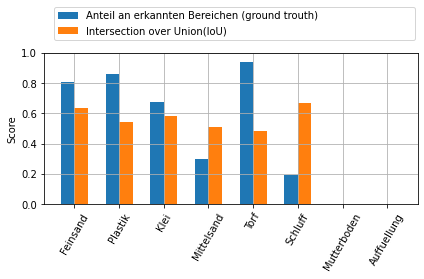

In [ ]:
#filter and sort results

# 1 filter soiltype_filter
soiltype_counter_bar = [] 
labels = []
accuracy_gt_detection_bar = []
iou_all_mean_bar = []
iou_all_std_bar = []
for i in soiltype_filter:
  soiltype_counter_bar.append(soiltype_counter[i])
  labels.append(dataset.class_names[i+1])
  accuracy_gt_detection_bar.append(accuracy_gt_detection[i])
  iou_all_mean_bar.append(iou_all_mean[i])
  iou_all_std_bar.append(iou_all_std[i])

# 2. sort after soiltype_counter_bar high to low
sort_soiltype_counter_bar = sorted(range(len(soiltype_counter_bar)), key=lambda k: soiltype_counter_bar[k],reverse=True)


labels_sort = [labels[i] for i in sort_soiltype_counter_bar]
accuracy_gt_detection_bar_sort = [accuracy_gt_detection_bar[i] for i in sort_soiltype_counter_bar]
iou_all_mean_bar_sort =[iou_all_mean_bar[i] for i in sort_soiltype_counter_bar]
iou_all_std_bar_sort = [iou_all_std_bar[i] for i in sort_soiltype_counter_bar]




x = np.arange(len(labels_sort))  # the label locations
width = 0.3  # the width of the bars
# plt.figure(figsize=(4.5, 2.5))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, accuracy_gt_detection_bar_sort, width, label='Anteil an erkannten Bereichen (ground trouth)') #color = 'b' 'accuracy_gt_detection = soiltyps_sum_accouracy/soiltype_counter'
rects2 = ax.bar(x + width/2, iou_all_mean_bar_sort, width, label='Intersection over Union(IoU)')
# rects3 = ax.bar(x + 1.5*width, iou_all_std_bar_sort, width, label='Standartabweichung von IoU')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_ylim(0,1)
plt.xticks(x, labels_sort, rotation=60)
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
# plt.gca().legend(loc='upper center', bbox_to_anchor=(2,1))
plt.gca().legend(bbox_to_anchor=(0., 1.02, 1.02, .102), loc=3, mode="expand", borderaxespad=1)

plt.grid(True)

# ax_title = ['Bewertung der Vorhersage Projekt 9091', 'Bewertung der Vorhersage Projekt 8205', 'Bewertung der Vorhersage Projekt 9091 und 8205']
# ax.set_title(ax_title[model_mode-1]) 
# ax.title.set_position([.5,.5])
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height.round(2)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
fig.tight_layout()
genauigkeit_model_mode = ['Genauigkeit_IoU_9091.png','Genauigkeit_IoU_8025.png','Genauigkeit_IoU_9091_8025.png']
path_to_image = os.path.join(path_to_image_folder,genauigkeit_model_mode[model_mode-1]) #change Project names!!! raw_Data_folder_path
# plt.savefig(path_to_image,'Genauigkeit_IoU.pgf')
plt.savefig(path_to_image,dpi = 200)
plt.show()
# plt.savefig(path_to_image,'Genauigkeit_IoU.png')
# plt.savefig(path_to_image,'Genauigkeit_IoU.pgf')

In [ ]:
#reload soiltyp.py
# %cd '/content/Mask_rcnn_small_tf1_soiltyp'
%cd '/content'
sys.path.append('Mask_rcnn_small_tf1_soiltyp')
importlib.reload(visualize)

/content


<module 'mrcnn.visualize_thick' from 'Mask_rcnn_small_tf1_soiltyp/mrcnn/visualize_thick.py'>

In [ ]:
# ToDo: use compute_matches_classwise in utils.py

# Compute VOC-style Average Precision
def compute_batch_ap(image_ids,dataset):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        # temp_mask_2 = r['masks'].astype(int)
        #create annotation for all bbox in one image as polygons. returns regions_rois
        # regions_mask_rois_adapted = []
        # regions_mask_rois_adapted, index_out_of_range_i = create_all_regions_mask_rois_adapted(temp_mask_2)
        # #print(r['masks'])
        # print(regions_mask_rois_adapted)
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'],
                             overlaps_mask_or_bbox = 'bbox', iou_threshold=0.7)
        APs.append(AP)
        print(APs)
    return APs

# Pick a set of random images
image_ids = dataset.image_ids # np.random.choice(dataset_val.image_ids,1)
print(image_ids)
APs = compute_batch_ap(image_ids,dataset)
print("mAP @ IoU=50: ", np.mean(APs))
for id_aps_i,aps_i in enumerate(APs): 
    print("image_ids[{}]{:10.2f} APs".format(image_ids[id_aps_i], aps_i))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
[0.0]
[0.0, 0.10000000149011612]
[0.0, 0.10000000149011612, 0.1666666716337204]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0, 0.3333333432674408]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0, 0.3333333432674408, 1.0]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0, 0.3333333432674408, 1.0, 0.0]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0, 0.3333333432674408, 1.0, 0.0, 0.0]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0, 0.3333333432674408, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0, 0.3333333432674408, 1.0, 0.0, 0.0, 0.0, 0.3333333432674408]
[0.0, 0.10000000149011612, 0.1666666716337204, 0.0, 0.25, 0.0, 0.3333

In [ ]:
#%% save to csv


APs_csv_name = '%s_APs.csv'%model_name
path_APs_csv = os.path.join(path_to_image_folder,APs_csv_name)
with open(path_APs_csv, "w", newline="") as f_stypes: 
    if True: #True False 
        fieldnames=['APs']
        writer = csv.writer(f_stypes)
        writer.writerow(image_ids) #column
        writer.writerow(list(np.around(np.array(APs),2)))
        

In [ ]:
#use this for multible files, folders
!zip -r '/content/prediction3.zip' '/content/prediction/09_15_17_24_25soiltype20200910T0956_mask_rcnn_soiltype_0025'

# Old Code




## Inspect Input data

für training ist Soilsample_DIR nicht wichtig nur notwendig um dataset zu sehen. path wird in soilsample.py der train nochmal aus args.dataset genommen

In [ ]:
dataset = dataset_val

In [ ]:

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 106
Class Count: 17
  0. BG                                                
  1. Mutterboden                                       
  2. Schluff                                           
  3. Klei                                              
  4. Torf                                              
  5. Sand                                              
  6. Feinsand                                          
  7. Mittelsand                                        
  8. Plastik                                           
  9. Unbekannt                                         
 10. Darg                                              
 11. Mudde                                             
 12. Grobdsand                                         
 13. Wurzeln                                           
 14. Torf + Sand                                       
 15. Braunkohle + Holz                                 
 16. AuffÃ¼llung                                       


In [ ]:
# Soilsample_DIR = os.path.join(ROOT_DIR, '/content/data/datasets/soilsample')

In [ ]:
# # Load dataset
# # Get the dataset from the releases page
# # https://github.com/matterport/Mask_RCNN/releases
# dataset = soiltype.SoilsampleDataset()
# dataset.load_soilsample('/content/dataset_test_mask','val') #(Soilsample_DIR, "val")  

# # Must call before using the dataset
# dataset.prepare()

# print("Image Count: {}".format(len(dataset.image_ids)))
# print("Class Count: {}".format(dataset.num_classes))
# for i, info in enumerate(dataset.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

Image Count: 1
Class Count: 17
  0. BG                                                
  1. Mutterboden                                       
  2. Schluff                                           
  3. Klei                                              
  4. Torf                                              
  5. Sand                                              
  6. Feinsand                                          
  7. Mittelsand                                        
  8. Plastik                                           
  9. Unbekannt                                         
 10. Darg                                              
 11. Mudde                                             
 12. Grobdsand                                         
 13. Wurzeln                                           
 14. Torf + Sand                                       
 15. Braunkohle + Holz                                 
 16. AuffÃ¼llung                                       


## Display Samples

Load and display images and masks.

In [ ]:
# Load and display random samples
image_ids =[0,1] # np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    print(dataset.image_reference(image_id))
    image = dataset.load_image(image_id)# , plugin='pil'
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Bounding Boxes

Rather than using bounding box coordinates provided by the source datasets, we compute the bounding boxes from masks instead. This allows us to handle bounding boxes consistently regardless of the source dataset, and it also makes it easier to resize, rotate, or crop images because we simply generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

image_id  18 /content/rawData_train_val_test/test/Img_5270BKF 28_4.png
image                    shape: (1407, 2667, 3)       min:   21.00000  max:  255.00000  uint8
mask                     shape: (1407, 2667, 1)       min:    0.00000  max:    1.00000  uint8
class_ids                shape: (1,)                  min:    6.00000  max:    6.00000  int32
bbox                     shape: (1, 4)                min:  492.00000  max: 2623.00000  int32


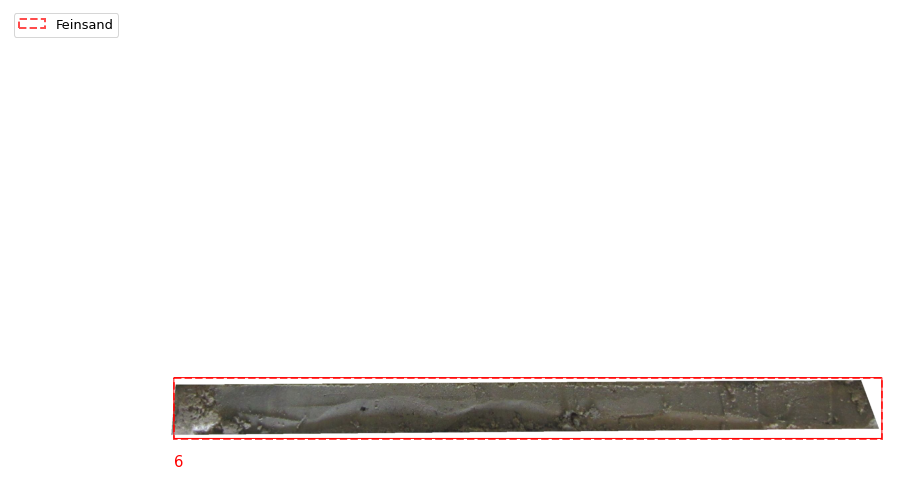

In [ ]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id) #, plugin='pil'
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Resize Images

To support multiple images per batch, images are resized to one size (1024x1024). Aspect ratio is preserved, though. If an image is not square, then zero padding is added at the top/bottom or right/left.

image_id:  9 /content/rawData_train_val_test/test/IMG_5269BKF 28_0.png
Original shape:  (2112, 2816, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8
class_ids                shape: (2,)                  min:    6.00000  max:    7.00000  int32
bbox                     shape: (2, 4)                min:  169.00000  max:  919.00000  int32


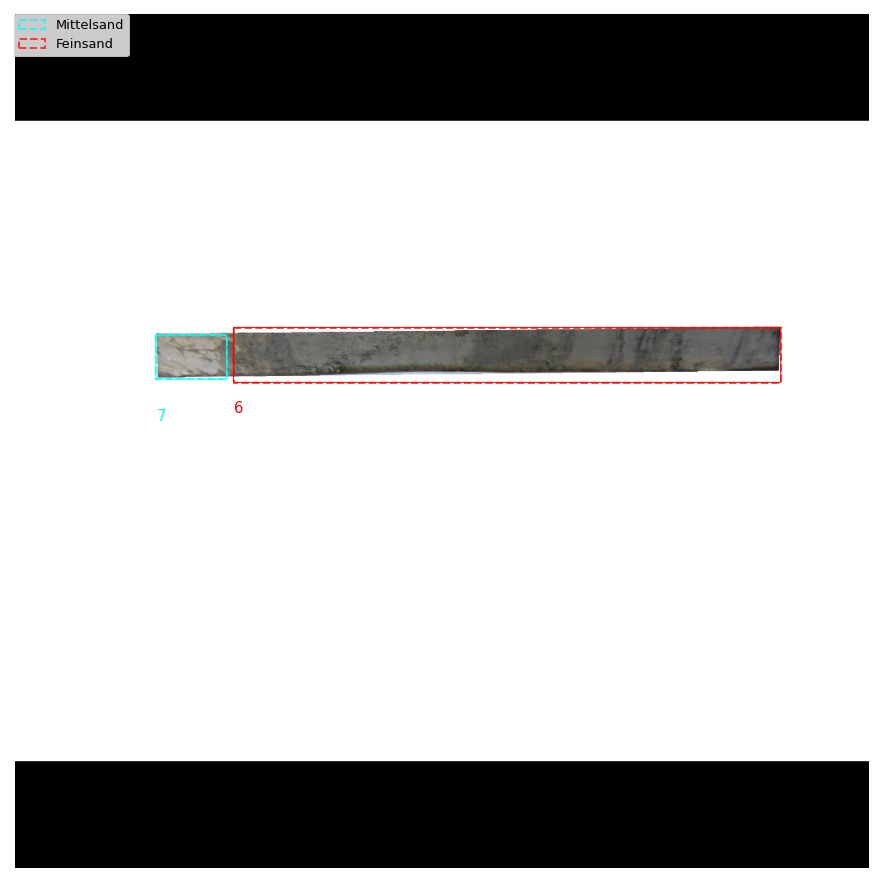

In [ ]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Mini Masks

Instance binary masks can get large when training with high resolution images. For example, if training with 1024x1024 image then the mask of a single instance requires 1MB of memory (Numpy uses bytes for boolean values). If an image has 100 instances then that's 100MB for the masks alone. 

To improve training speed, we optimize masks by:
* We store mask pixels that are inside the object bounding box, rather than a mask of the full image. Most objects are small compared to the image size, so we save space by not storing a lot of zeros around the object.
* We resize the mask to a smaller size (e.g. 56x56). For objects that are larger than the selected size we lose a bit of accuracy. But most object annotations are not very accuracy to begin with, so this loss is negligable for most practical purposes. Thie size of the mini_mask can be set in the config class.

To visualize the effect of mask resizing, and to verify the code correctness, we visualize some examples.

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (29,)                 min:    0.00000  max: 2816.00000  float64
class_ids                shape: (4,)                  min:    1.00000  max:    6.00000  int32
bbox                     shape: (4, 4)                min:  165.00000  max:  926.00000  int32
mask                     shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  uint8


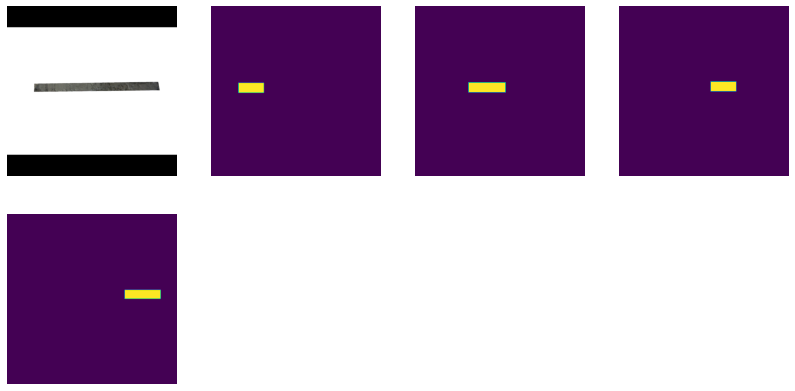

In [ ]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

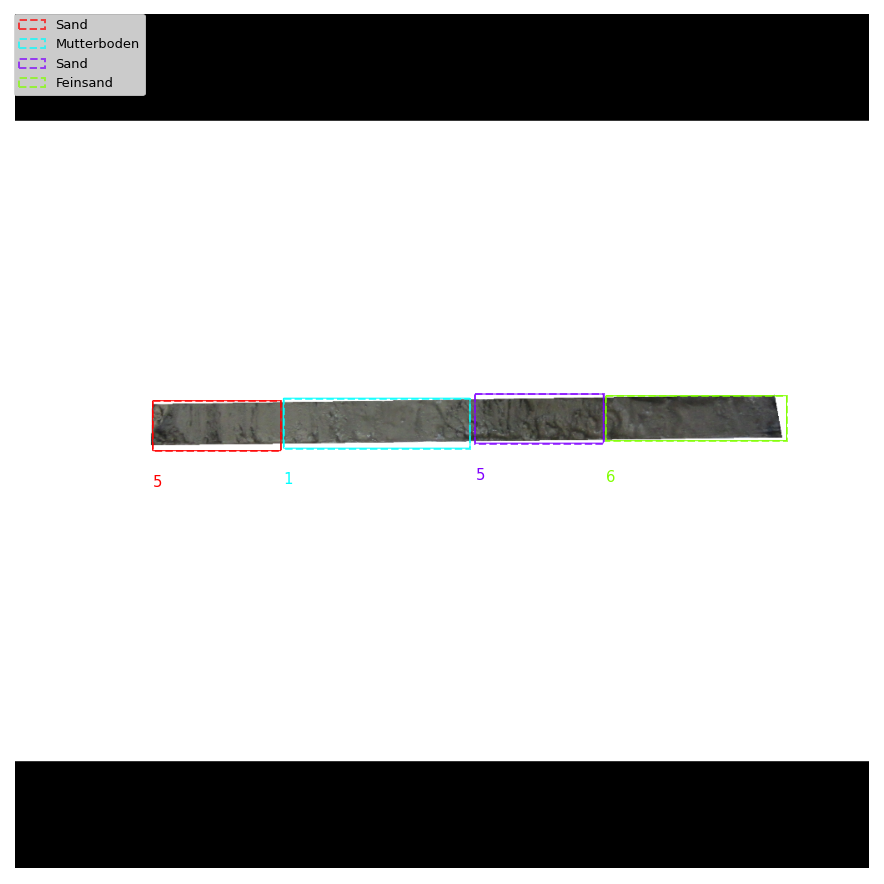

In [ ]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (56, 56, 4)           min:    1.00000  max:    1.00000  bool


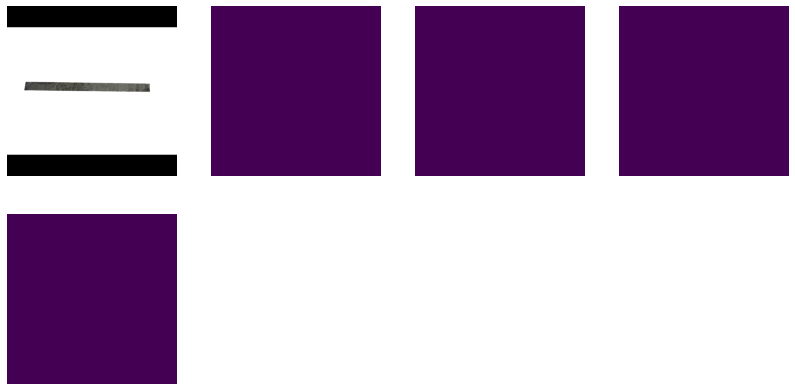

In [ ]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

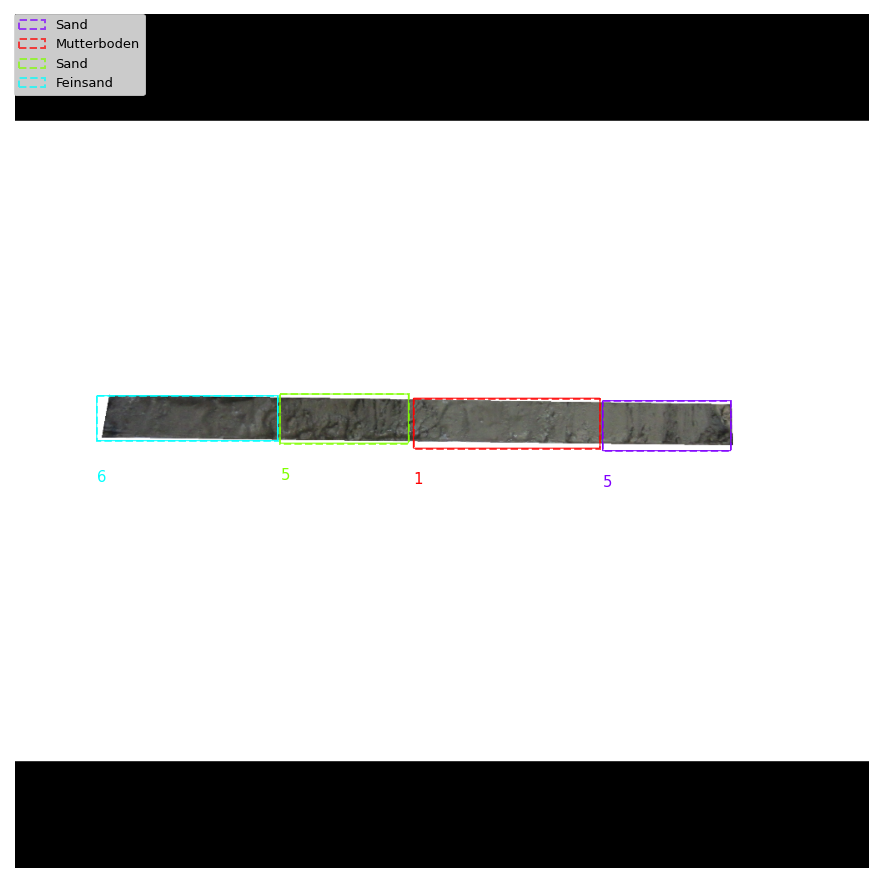

In [ ]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Anchors

The order of anchors is important. Use the same order in training and prediction phases. And it must match the order of the convolution execution.

For an FPN network, the anchors must be ordered in a way that makes it easy to match anchors to the output of the convolution layers that predict anchor scores and shifts. 
* Sort by pyramid level first. All anchors of the first level, then all of the second and so on. This makes it easier to separate anchors by level.
* Within each level, sort anchors by feature map processing sequence. Typically, a convolution layer processes a feature map starting from top-left and moving right row by row. 
* For each feature map cell, pick any sorting order for the anchors of different ratios. Here we match the order of ratios passed to the function.

**Anchor Stride:**
In the FPN architecture, feature maps at the first few layers are high resolution. For example, if the input image is 1024x1024 then the feature meap of the first layer is 256x256, which generates about 200K anchors (256*256*3). These anchors are 32x32 pixels and their stride relative to image pixels is 4 pixels, so there is a lot of overlap. We can reduce the load significantly if we generate anchors for every other cell in the feature map. A stride of 2 will cut the number of anchors by 4, for example. 

In this implementation we use an anchor stride of 2, which is different from the paper.

In [ ]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  261888
Scales:  (32, 64, 128, 256, 512)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 196608
Anchors in Level 1: 49152
Anchors in Level 2: 12288
Anchors in Level 3: 3072
Anchors in Level 4: 768


Visualize anchors of one cell at the center of the feature map of a specific level.

Level 0. Anchors: 196608  Feature map Shape: [256 256]
Level 1. Anchors:  49152  Feature map Shape: [128 128]
Level 2. Anchors:  12288  Feature map Shape: [64 64]
Level 3. Anchors:   3072  Feature map Shape: [32 32]
Level 4. Anchors:    768  Feature map Shape: [16 16]


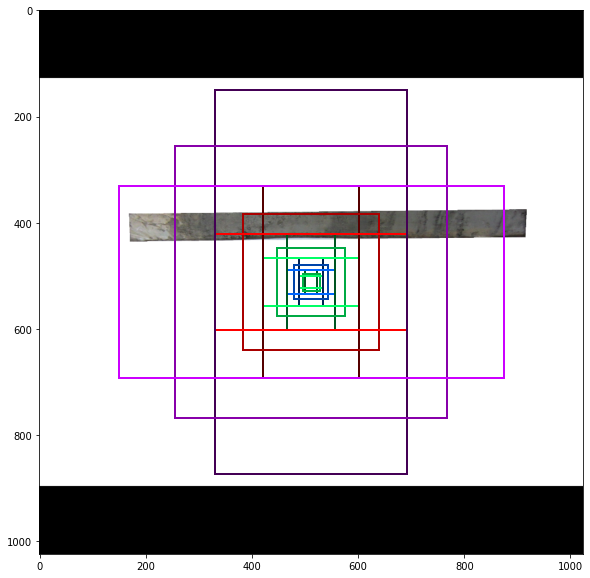

In [ ]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)


## Data Generator


In [ ]:
# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)

In [ ]:
# Uncomment to run the generator through a lot of images
# to catch rare errors
# for i in range(1000):
#     print(i)
#     _, _ = next(g)

In [ ]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = modellib.parse_image_meta(image_meta)["image_id"][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

rois                     shape: (4, 200, 4)           min:    0.00000  max: 1023.00000  int32
mrcnn_class_ids          shape: (4, 200, 1)           min:    0.00000  max:    7.00000  int32
mrcnn_bbox               shape: (4, 200, 17, 4)       min:   -3.35252  max:    3.16794  float32
mrcnn_mask               shape: (4, 200, 28, 28, 17)  min:    0.00000  max:    1.00000  float32
gt_class_ids             shape: (4, 100)              min:    0.00000  max:    7.00000  int32
gt_boxes                 shape: (4, 100, 4)           min:    0.00000  max:  979.00000  int32
gt_masks                 shape: (4, 56, 56, 100)      min:    0.00000  max:    1.00000  bool
rpn_match                shape: (4, 261888, 1)        min:   -1.00000  max:    1.00000  int32
rpn_bbox                 shape: (4, 256, 4)           min:   -5.12108  max:    4.21226  float64
image_id:  5 /content/rawData_train_val_test/test/Img_5268BKF 28_1.png


anchors                  shape: (261888, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (16, 4)               min:  169.00000  max:  930.99994  float32
Positive anchors: 16
Negative anchors: 240
Neutral anchors: 261632
BG                     : 173
Mutterboden            : 4
Sand                   : 18
Feinsand               : 5


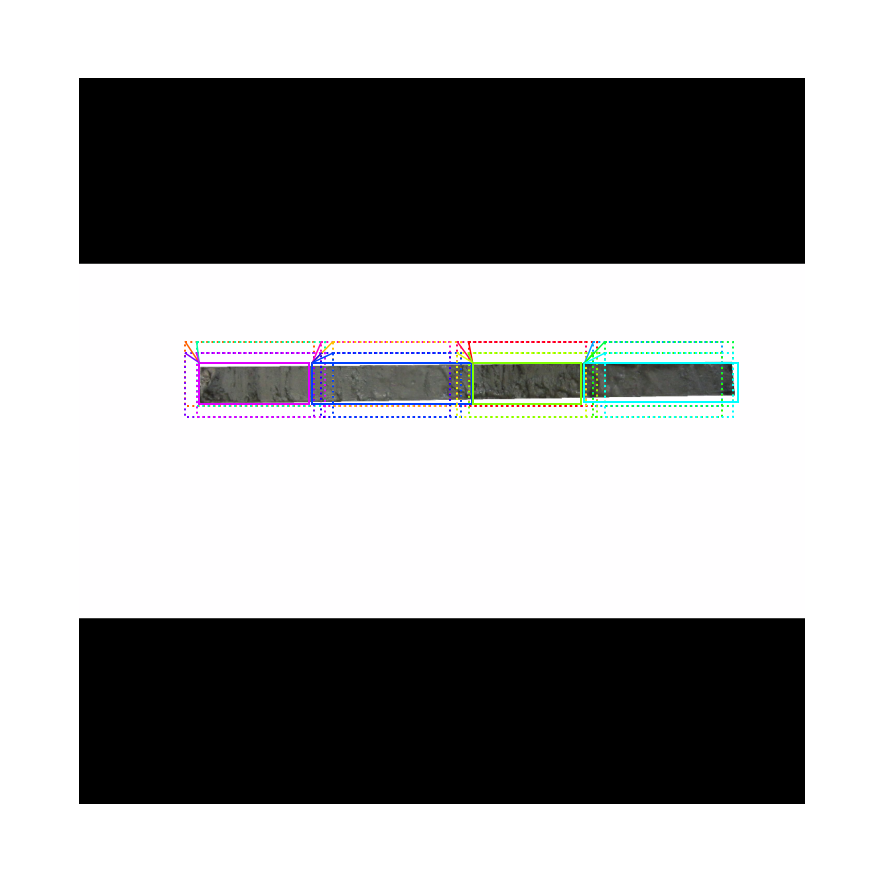

In [ ]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)

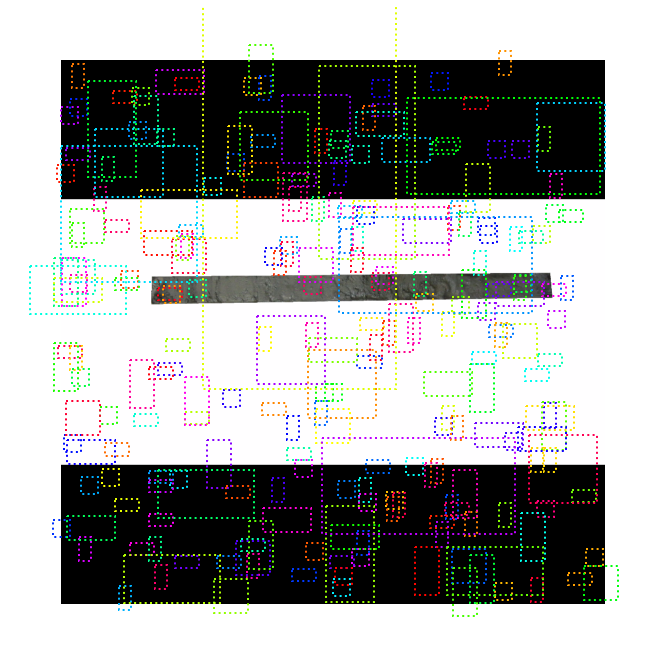

In [ ]:
# Show negative anchors
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])

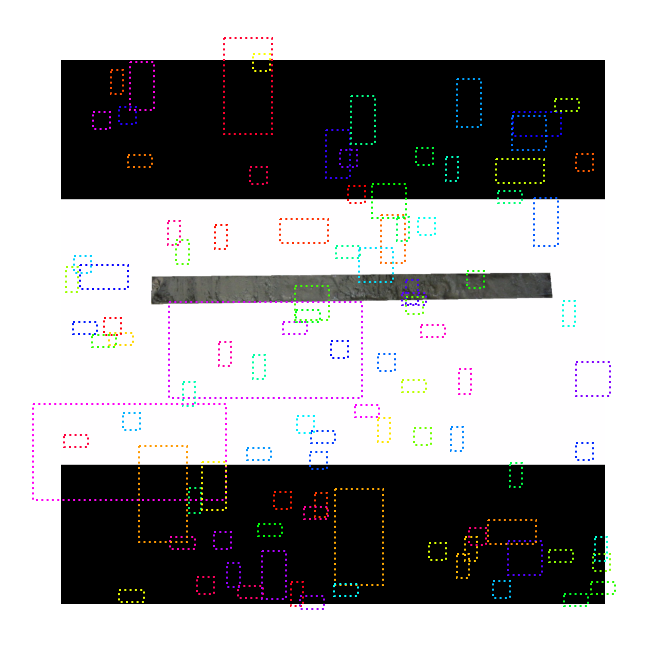

In [ ]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

## ROIs

Positive ROIs:  27
Negative ROIs:  173
Positive Ratio: 0.14
Unique ROIs: 200 out of 200


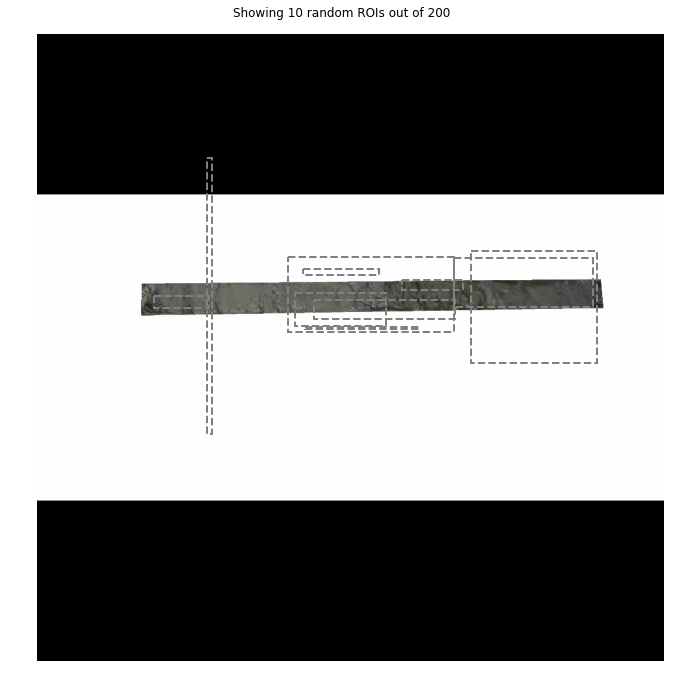

In [ ]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

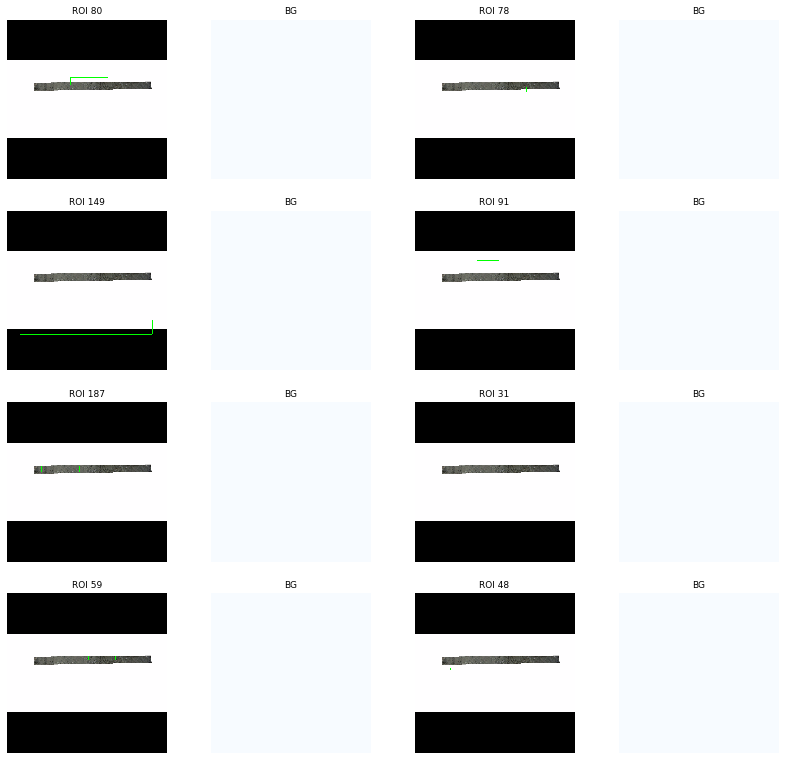

In [ ]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [ ]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
Average percent: 0.33
